# CENVAL-ARC Workshop: Hands-on Demo

This hands-on demo will use Scikit Learn to build a classification model.

The purpose of this demo is to show that individuals can quickly get to coding and conducting analyses with a common environment. This is useful in both instructional and research settings, where a consistent environment eliminates several headaches.

This consistency comes from using software containers and common infrastructure.
In this case, we are using an official Project Jupyter container image, [SciPy notebook](https://github.com/jupyter/docker-stacks/tree/main/images/scipy-notebook), which has several common scientific python packages pre-installed.

Using the NRP, instructors and researchers can build and bring their own software containers to enable instruction and research collaboration.

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

source image:https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png

Parts of this notebook were adapted from a Kaggle Submission on this dataset and was adapted for this demo:
- Siti Khotijah
- Mahnaz Arjmand


This study we try to clustering Iris Dataset used Kmeans.
[Iris - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris)
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator

### Load the Dataset

In [ ]:


# Load iris dataset from sklearn
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

# Create DataFrame for easier handling (optional, if needed later)
iris = pd.DataFrame(X, columns=iris_dataset.feature_names)
iris['target'] = y
iris["species"] = iris["target"].map({
    0: "Iris-setosa",
    1: "Iris-versicolor",
    2: "Iris-virginica"
})

iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Iris-virginica
146,6.3,2.5,5.0,1.9,2,Iris-virginica
147,6.5,3.0,5.2,2.0,2,Iris-virginica
148,6.2,3.4,5.4,2.3,2,Iris-virginica


In [13]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [14]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

**Distribution plots
**

plot each flower to a histogram

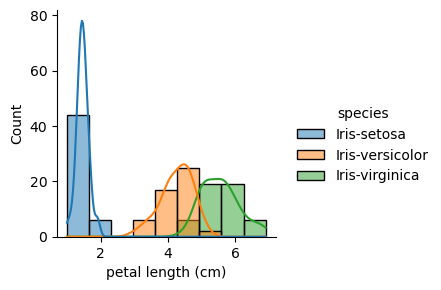

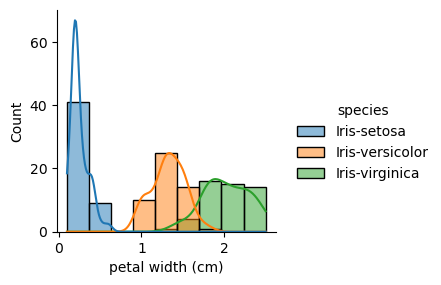

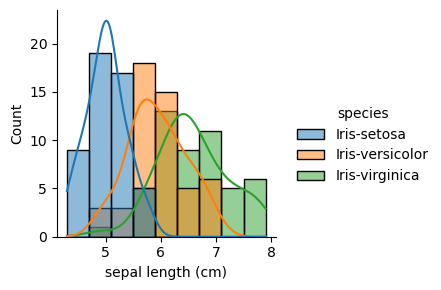

In [21]:
sns.displot(data=iris, x="petal length (cm)", hue="species", kde=True, height=3)
sns.displot(data=iris, x="petal width (cm)", hue="species", kde=True, height=3)
sns.displot(data=iris, x="sepal length (cm)", hue="species", kde=True, height=3)

plt.show()

### Box Plot

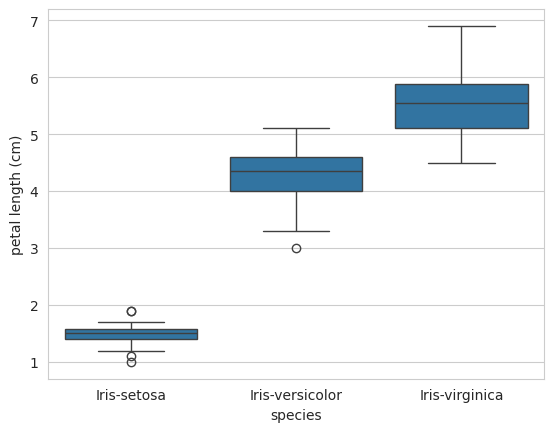

In [26]:
sns.boxplot(x="species",y="petal length (cm)",data=iris)
plt.show()

### Violin Plot

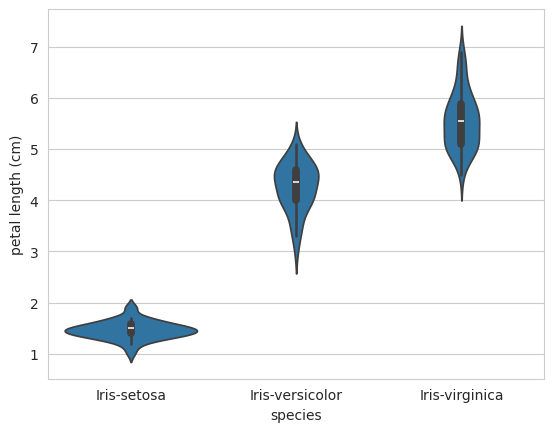

In [27]:
sns.violinplot(x="species",y="petal length (cm)",data=iris)
plt.show()

**Scatter plot**


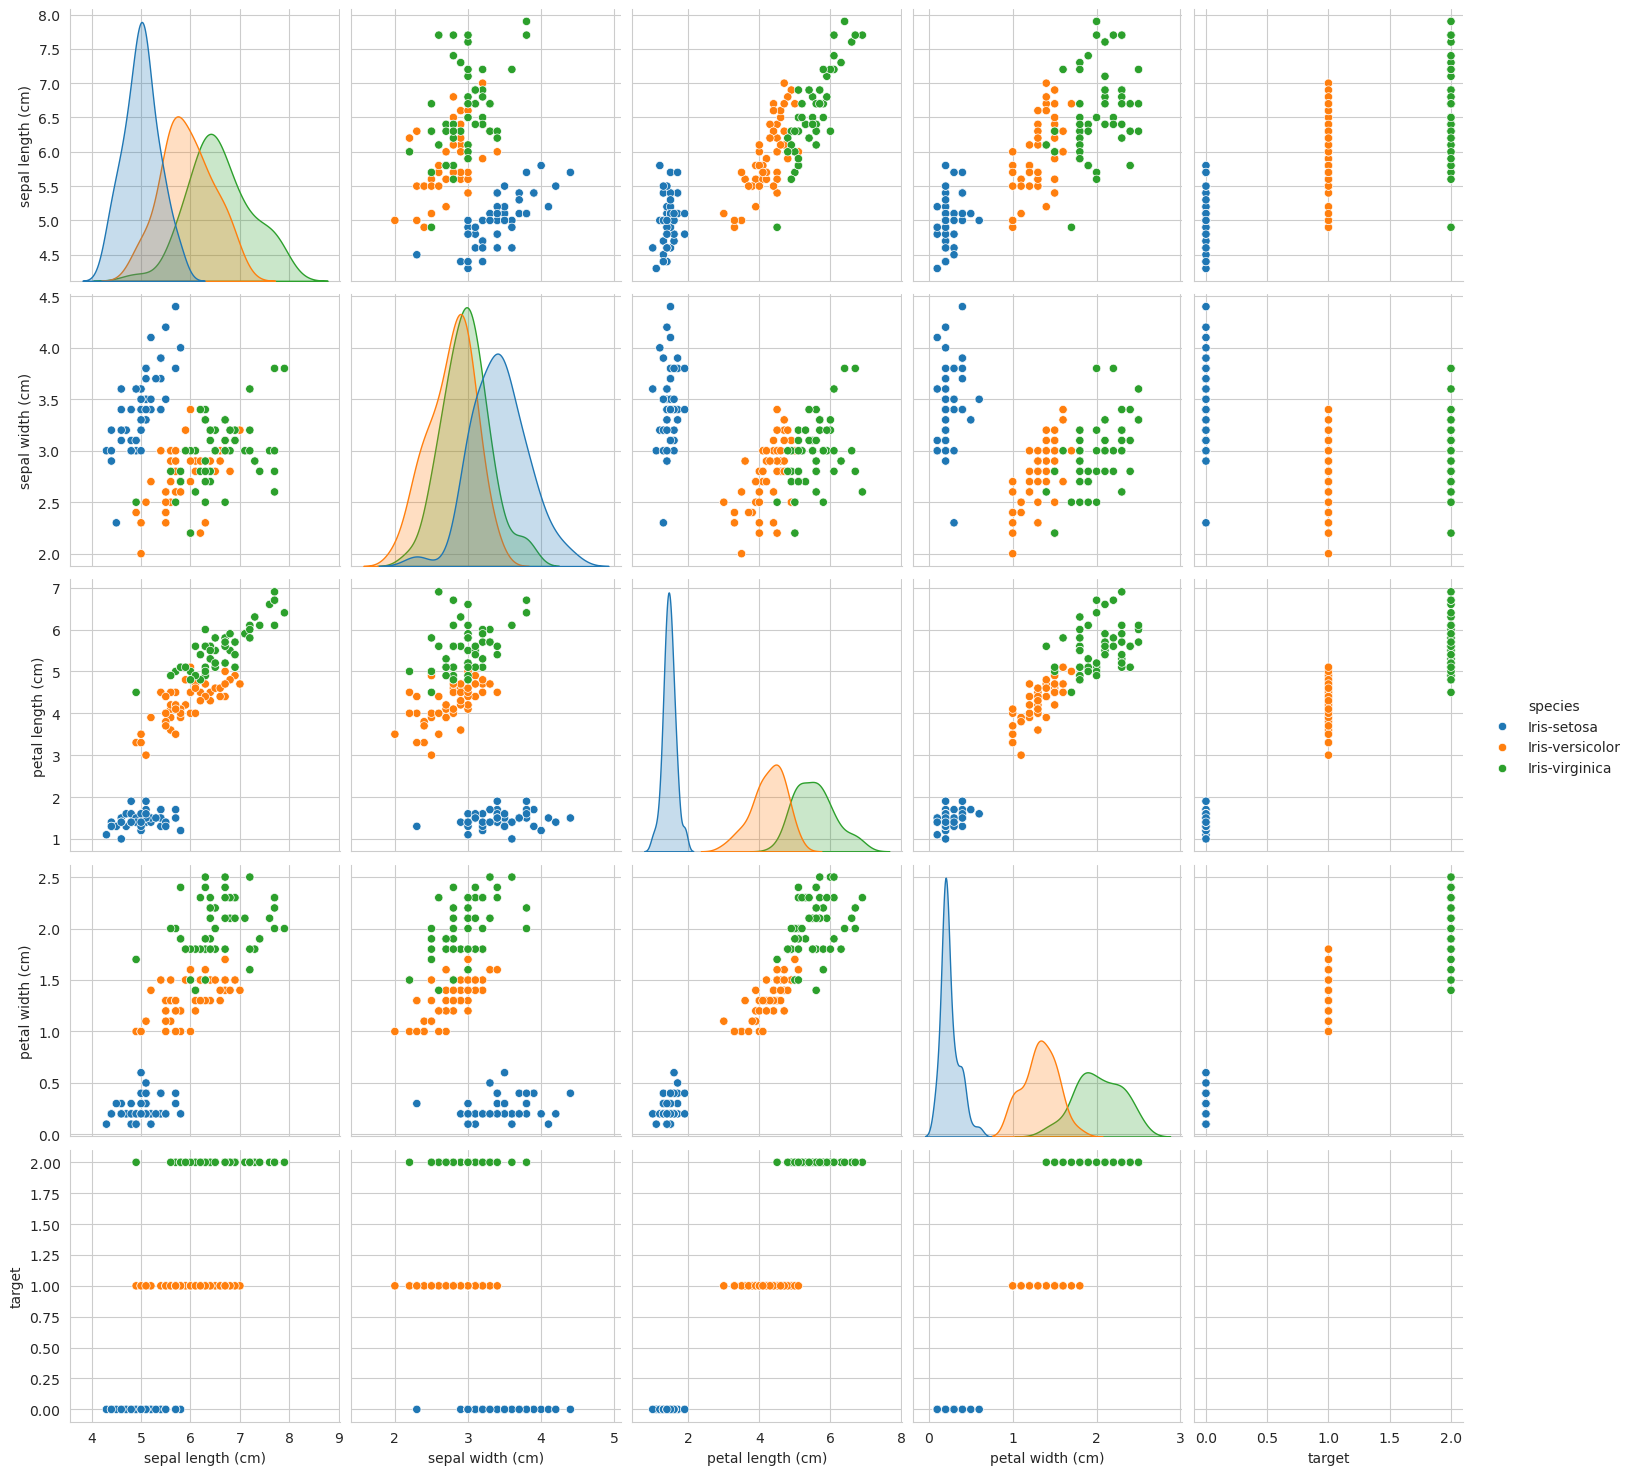

In [65]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3)
plt.show()

# K-Means

[K-means](http://https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

# How to Implementing K-Means Clustering ?

1. Choose the number of clusters k
2. Select k random points from the data as centroids
3. Assign all the points to the closest cluster centroid
4. Recompute the centroids of newly formed clusters
5. Repeat steps 3 and 4


In [ ]:
#Finding the optimum number of clusters for k-means classification

# Define feature matrix
x = iris.iloc[:, 0:4]
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Using the elbow method to determine the optimal number of clusters for k-means clustering


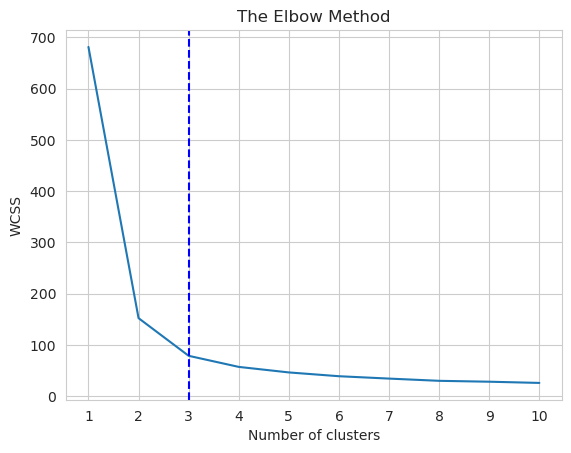

In [43]:
k1=KneeLocator(range(1,11),wcss , curve='convex', direction= 'decreasing')
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.axvline(x=k1.elbow, color='b', label= 'axvline-full height', ls= '--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Implementing K-Means Clustering

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

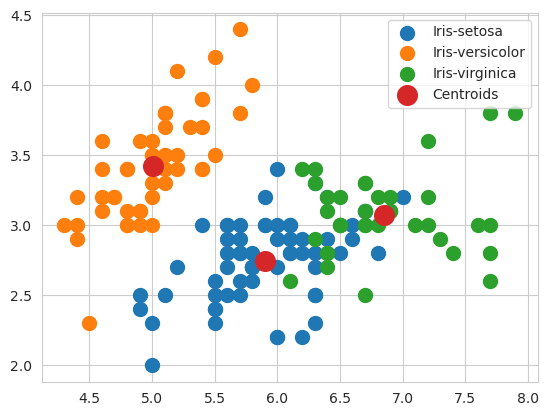

In [48]:
#Visualising the clusters
species_names = {
    0: "Iris-setosa",
    1: "Iris-versicolor",
    2: "Iris-virginica"
}

X = x.to_numpy()

for i in range(3):
    plt.scatter(X[y_kmeans == i, 0],
                X[y_kmeans == i, 1],
                s=100,
                label=species_names[i])

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200,
            label="Centroids")

plt.legend()
plt.show()

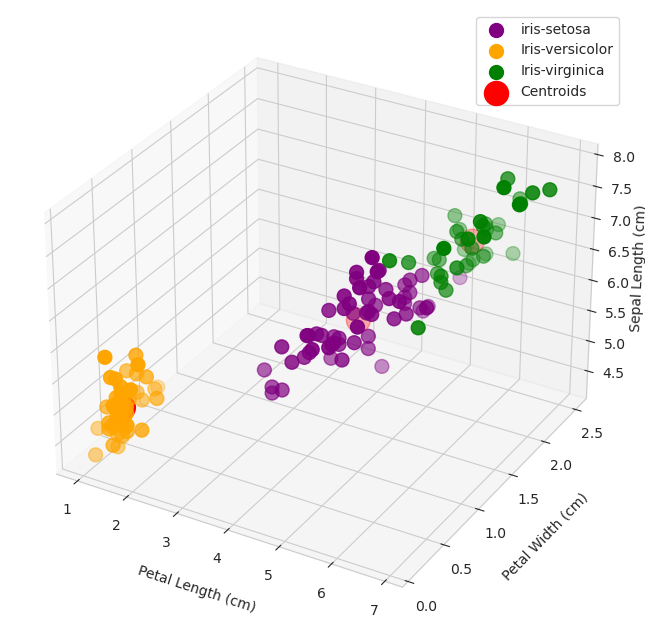

In [ ]:
# 3d scatterplot using matplotlib
# Convert to NumPy
X = x.to_numpy()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

species_names = {
    0: "iris-setosa",
    1: "Iris-versicolor",
    2: "Iris-virginica"
}

colors = {
    0: "purple",
    1: "orange",
    2: "green"
}

# Indices of best features:
# 2 = petal length
# 3 = petal width
# 0 = sepal length

for i in range(3):
    ax.scatter(
        X[y_kmeans == i, 2],   # Petal Length
        X[y_kmeans == i, 3],   # Petal Width
        X[y_kmeans == i, 0],   # Sepal Length
        s=100,
        c=colors[i],
        label=species_names[i]
    )

# Plot centroids
ax.scatter(
    kmeans.cluster_centers_[:, 2],
    kmeans.cluster_centers_[:, 3],
    kmeans.cluster_centers_[:, 0],
    s=300,
    c="red",
    label="Centroids"
)

ax.set_xlabel("Petal Length (cm)", labelpad=10)
ax.set_ylabel("Petal Width (cm)", labelpad=10)
ax.set_zlabel("Sepal Length (cm)", labelpad=0)

ax.legend()
plt.show()